# Chapter 15: Machine learning

In [1]:
from sklearn import datasets
from sklearn import cross_validation
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster

/home/bjpcjp/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import seaborn as sns

# Built in datasets

In [5]:
datasets.load_boston

<function sklearn.datasets.base.load_boston>

In [6]:
datasets.fetch_california_housing

<function sklearn.datasets.california_housing.fetch_california_housing>

In [7]:
datasets.make_regression

<function sklearn.datasets.samples_generator.make_regression>

# Regression

In [8]:
np.random.seed(123)

In [9]:
X_all, y_all = datasets.make_regression(n_samples=50, n_features=50, n_informative=10) #, noise=2.5)

In [10]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_all, y_all, train_size=0.5)

In [11]:
X_train.shape, y_train.shape

((25, 50), (25,))

In [12]:
X_test.shape, y_test.shape

((25, 50), (25,))

In [13]:
model = linear_model.LinearRegression()

In [14]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
def sse(resid):
    return sum(resid**2)

In [16]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

1.3764928598510062e-24

In [17]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_train)
sse_test

1.3764928598510062e-24

In [18]:
model.score(X_train, y_train)

1.0

In [19]:
model.score(X_test, y_test)

0.31407400675201735

In [20]:
def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("sample number")
    axes[0].set_ylabel("residual")
    axes[0].set_title("training data")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("sample number")
    axes[1].set_ylabel("residual")
    axes[1].set_title("testing data")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("coefficient number")
    axes[2].set_ylabel("coefficient")
    fig.tight_layout()
    return fig, axes

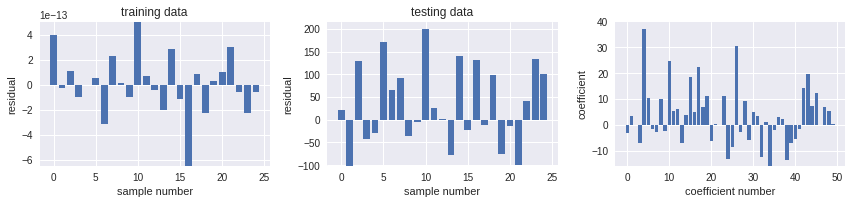

In [21]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
fig.savefig("ch15-regression-ols.pdf")

In [22]:
model = linear_model.Ridge() #alpha=2.5)

In [23]:
model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [24]:
resid_train = y_train - model.predict(X_train)
sse_train = sum(resid_train**2)
sse_train

178.5069516495096

In [25]:
resid_test = y_test - model.predict(X_test)
sse_test = sum(resid_test**2)
sse_test

212737.00160105841

In [26]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.99945955150173349, 0.31670332736075446)

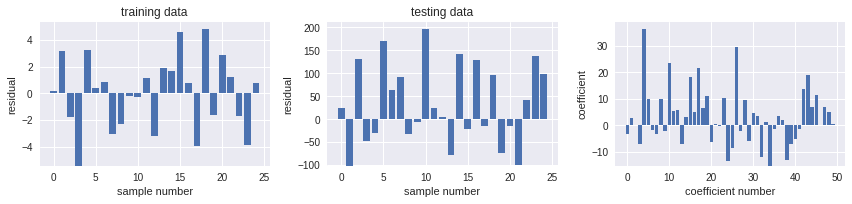

In [27]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
fig.savefig("ch15-regression-ridge.pdf")

In [28]:
model = linear_model.Lasso(alpha=1.0)

In [29]:
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

309.749713895323

In [31]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

1489.1176065002585

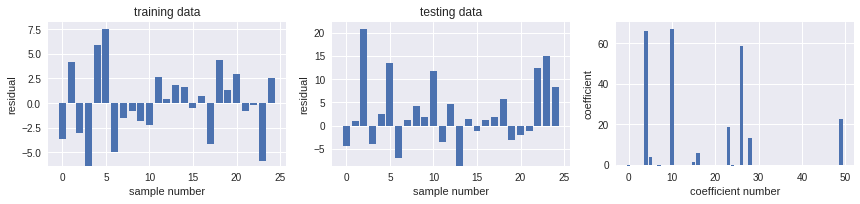

In [32]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
fig.savefig("ch15-regression-lasso.pdf")

In [33]:
alphas = np.logspace(-4, 2, 100)

In [34]:
coeffs = np.zeros((len(alphas), X_train.shape[1]))
sse_train = np.zeros_like(alphas)
sse_test = np.zeros_like(alphas)

for n, alpha in enumerate(alphas):
    model = linear_model.Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    resid = y_train - model.predict(X_train)
    sse_train[n] = sum(resid**2)
    resid = y_test - model.predict(X_test)
    sse_test[n] = sum(resid**2)

/home/bjpcjp/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


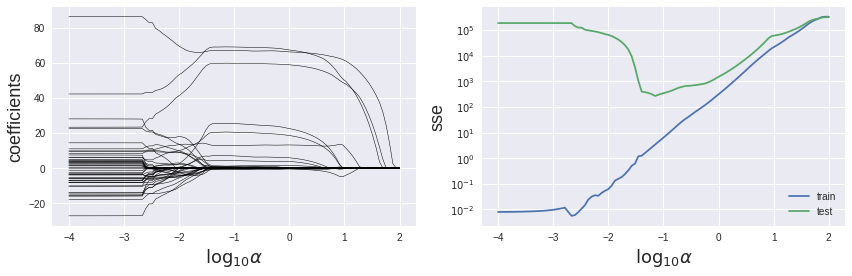

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

for n in range(coeffs.shape[1]):
    axes[0].plot(np.log10(alphas), coeffs[:, n], color='k', lw=0.5)

axes[1].semilogy(np.log10(alphas), sse_train, label="train")
axes[1].semilogy(np.log10(alphas), sse_test, label="test")
axes[1].legend(loc=0)

axes[0].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[0].set_ylabel(r"coefficients", fontsize=18)
axes[1].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[1].set_ylabel(r"sse", fontsize=18)
fig.tight_layout()
fig.savefig("ch15-regression-lasso-vs-alpha.pdf")

In [36]:
model = linear_model.LassoCV()

In [37]:
model.fit(X_all, y_all)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [38]:
model.alpha_

0.06559238747534718

In [39]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

1.5450589323146529

In [40]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

1.5321417406216356

In [41]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.99999532217220677, 0.99999507886570982)

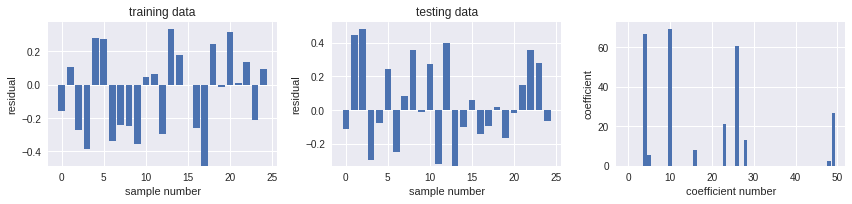

In [42]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
fig.savefig("ch15-regression-lasso-cv.pdf")

In [43]:
model = linear_model.ElasticNetCV()

In [44]:
model.fit(X_all, y_all)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [45]:
model.alpha_

0.13118477495069436

In [46]:
model.l1_ratio

0.5

In [47]:
resid_train = y_train - model.predict(X_train)
sse_train = sum(resid_train**2)
sse_train

2183.8391729391255

In [48]:
resid_test = y_test - model.predict(X_test)
sse_test = sum(resid_test**2)
sse_test

2650.050446338249

In [49]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.99338819810341106, 0.99148821954487831)

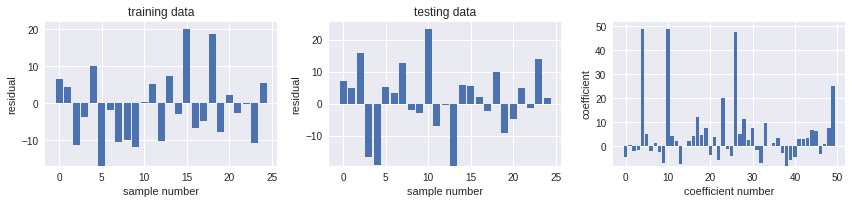

In [50]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
fig.savefig("ch15-regression-elastic-net-cv.pdf")

# Classification

In [51]:
iris = datasets.load_iris()

In [52]:
type(iris)

sklearn.datasets.base.Bunch

In [53]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [54]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [55]:
iris.data.shape

(150, 4)

In [56]:
iris.target.shape

(150,)

In [57]:
# print(iris['DESCR'])

In [58]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(iris.data, iris.target, train_size=0.7)

In [59]:
classifier = linear_model.LogisticRegression()

In [60]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
y_test_pred = classifier.predict(X_test)

In [62]:
print(metrics.classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.76      0.87        17
          2       0.75      1.00      0.86        12

avg / total       0.93      0.91      0.91        45



In [63]:
np.bincount(y_test)

array([16, 17, 12])

In [64]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[16,  0,  0],
       [ 0, 13,  4],
       [ 0,  0, 12]])

In [65]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[16,  0,  0],
       [ 0, 12,  5],
       [ 0,  0, 12]])

In [66]:
classifier = neighbors.KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[16,  0,  0],
       [ 0, 15,  2],
       [ 0,  0, 12]])

In [67]:
classifier = svm.SVC()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[16,  0,  0],
       [ 0, 15,  2],
       [ 0,  0, 12]])

In [68]:
classifier = ensemble.RandomForestClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[16,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 12]])

In [69]:
train_size_vec = np.linspace(0.1, 0.9, 30)

In [70]:
classifiers = [tree.DecisionTreeClassifier,
               neighbors.KNeighborsClassifier,
               svm.SVC,
               ensemble.RandomForestClassifier
              ]

In [71]:
cm_diags = np.zeros((3, len(train_size_vec), len(classifiers)), dtype=float)

In [72]:
for n, train_size in enumerate(train_size_vec):
    X_train, X_test, y_train, y_test = \
        cross_validation.train_test_split(iris.data, iris.target, train_size=train_size)

    for m, Classifier in enumerate(classifiers): 
        classifier = Classifier()
        classifier.fit(X_train, y_train)
        y_test_pred = classifier.predict(X_test)
        cm_diags[:, n, m] = metrics.confusion_matrix(y_test, y_test_pred).diagonal()
        cm_diags[:, n, m] /= np.bincount(y_test)

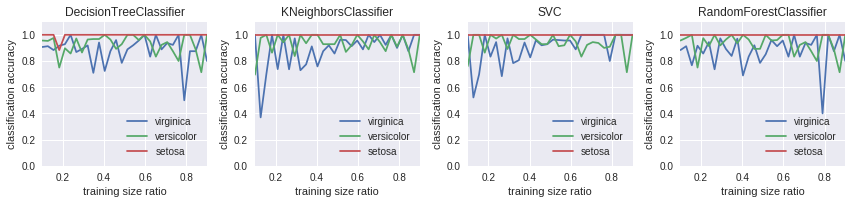

In [73]:
fig, axes = plt.subplots(1, len(classifiers), figsize=(12, 3))

for m, Classifier in enumerate(classifiers): 
    axes[m].plot(train_size_vec, cm_diags[2, :, m], label=iris.target_names[2])
    axes[m].plot(train_size_vec, cm_diags[1, :, m], label=iris.target_names[1])
    axes[m].plot(train_size_vec, cm_diags[0, :, m], label=iris.target_names[0])
    axes[m].set_title(type(Classifier()).__name__)
    axes[m].set_ylim(0, 1.1)
    axes[m].set_xlim(0.1, 0.9)
    axes[m].set_ylabel("classification accuracy")
    axes[m].set_xlabel("training size ratio")
    axes[m].legend(loc=4)

fig.tight_layout()
fig.savefig("ch15-classification-comparison.pdf")

# Clustering

In [74]:
X, y = iris.data, iris.target

In [75]:
np.random.seed(123)

In [76]:
n_clusters = 3

In [77]:
c = cluster.KMeans(n_clusters=n_clusters)

In [78]:
c.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [79]:
y_pred = c.predict(X)

In [80]:
y_pred[::8]

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0], dtype=int32)

In [81]:
y[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [82]:
idx_0, idx_1, idx_2 = (np.where(y_pred == n) for n in range(3))

In [83]:
y_pred[idx_0], y_pred[idx_1], y_pred[idx_2] = 2, 0, 1

In [84]:
y_pred[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2], dtype=int32)

In [85]:
metrics.confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

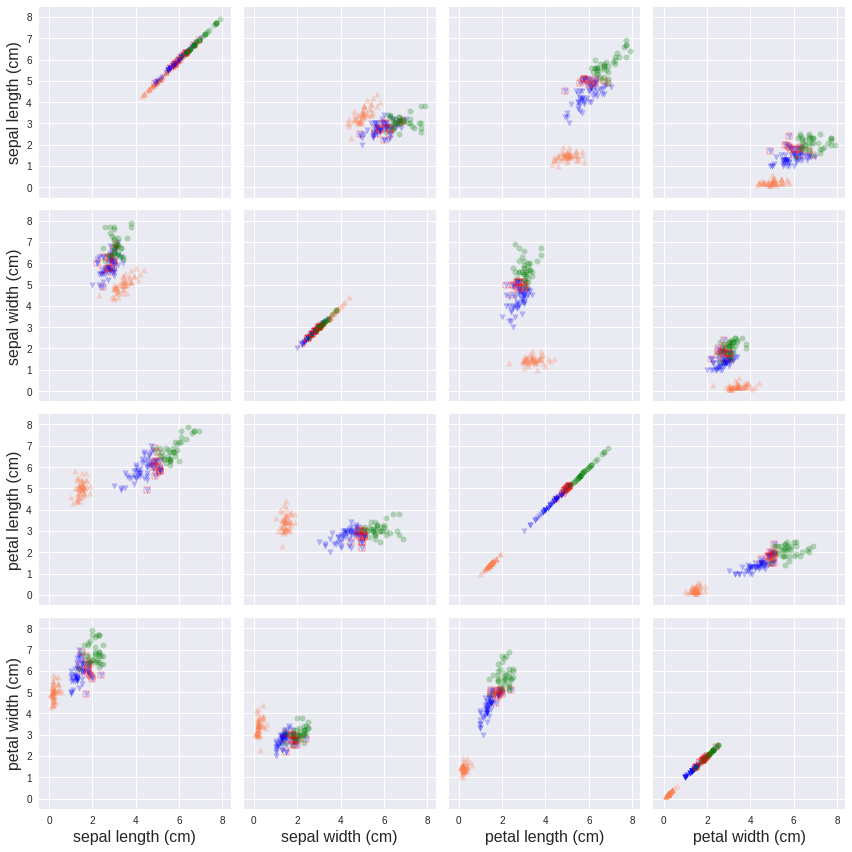

In [86]:
N = X.shape[1]

fig, axes = plt.subplots(N, N, figsize=(12, 12), sharex=True, sharey=True)

colors = ["coral", "blue", "green"]
markers = ["^", "v", "o"]
for m in range(N):
    for n in range(N):
        for p in range(n_clusters):
            mask = y_pred == p
            axes[m, n].scatter(X[:, m][mask], X[:, n][mask],
                               marker=markers[p], s=30, 
                               color=colors[p], alpha=0.25)

        for idx in np.where(y != y_pred):
            axes[m, n].scatter(X[idx, m], X[idx, n],
                               marker="s", s=30, 
                               edgecolor="red", 
                               facecolor=(1,1,1,0))
            
            
    axes[N-1, m].set_xlabel(iris.feature_names[m], fontsize=16)
    axes[m, 0].set_ylabel(iris.feature_names[m], fontsize=16)
fig.tight_layout()
fig.savefig("ch15-clustering.pdf")